# Evaluation Metrics example

Suppose we have a set of 100 patients. The model must predict whether each patient has a disease (Positive Class = “Disease YES”) or does not have a disease (Negative Class = “Disease NO”).

Problem assumptions:

- Total patients: 100.
- Patients with disease (Positive Class): 40.
- Patients without disease (Negative Class): 60.

The classification model predicted the results, and we obtain the following values in the confusion matrix:

|                     | Predicted Negative (0)  | Predicted Positive  (1) |
|:--------------------|:------------------------|:------------------------|
| Actual Negative (0) | **(TN)** = 55  | **(FP)** = 5 |
| Actual Positive (1) | **(FN)** = 15  | **(TP)** = 25  |


## Import modules

In [48]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc as sklearn_auc
import matplotlib.pyplot as plt



## Define ground and predictions

In [49]:
# Sample data (model prediction and actual classes) (1 = Disease, 0 = control)
# Actual class 
y_true = np.array([1] * 40 + [0] * 60)

# Model predictions
y_pred = np.array([1] * 25 + [0] * 15 + [1] * 5 + [0] * 55)

print(f"Actual: {y_true}")
print(f"Prediction: {y_pred}")

cm = confusion_matrix(y_true, y_pred)

print(f"Confusion Matrix: : {cm}")

Actual: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Prediction: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Confusion Matrix: : [[55  5]
 [15 25]]


## Accuracy

Accuracy is the proportion of correct predictions (both positive and negative) over the total number of cases:

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN} = \frac{25 + 55}{25 + 55 + 5 + 15} = 0.8
$$


The model has an accuracy of 80%, which means that it correctly predicted the diagnosis in 80% of the cases.

In [50]:
# Scikit-learn implementation
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8


## Precision

Precision is the proportion of true positives among all positive predictions:

$$
Precision = \frac{TP}{TP + FP} = \frac{25}{25 + 5} = 0.833
$$

Of all the times the model predicted “Disease YES”, 83.33% were correct.

In [51]:
# Scikit-learn implementation
precision = precision_score(y_true, y_pred)
print(f"Precision: {precision}")

Precision: 0.8333333333333334


## Recall (Sensitivity or TPR) ##
The recall or sensitivity is the proportion of true positives among all true positives:

$$
Recall = \frac{TP}{TP + FN} = \frac{25}{25 + 15} = 0.625
$$

The model correctly identified 62.5% of patients who actually had the disease.

In [52]:
# Scikit-learn implementation
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall}")

Recall: 0.625


##  F1-Score ##
The F1-Score is the harmonic mean of precision and recall, and is used when looking for a balance between these two metrics:

$$
F1 = 2 \times \frac{Precision \times  Recall}{Precision + Recall} = 2 \times \frac{0.833 \times  0.625}{0.833 + 0.625} = 0.714
$$

The F1-Score of the model is 71.4%, indicating a good balance between precision and recall.

In [53]:
# Scikit-learn implementation
f1 = f1_score(y_true, y_pred)
print(f"F1-Score: {f1}")

F1-Score: 0.7142857142857143


##  Specificity (Specificity or TNR) ##
Specificity is the proportion of true negatives among all true negative cases, i.e. it measures how well the model detects patients without disease:

$$
Specificity = \frac{TN}{TN + FP} = \frac{55}{55 + 55} = 0.916
$$

The model correctly identified 91.6% of patients without the disease.

In [54]:
# Scikit-learn implementation. There is no direct method for specificity. We can use the confusión matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn+fp)
print(f"Specificity: {specificity}")

Specificity: 0.9166666666666666


##  AUC-ROC (Area Under the ROC Curve) ##

The ROC curve shows the relationship between the True Positive Rate (TPR) and False Positive Rate (FPR) at different thresholds. The area under the curve (AUC) measures the overall ability of the model to distinguish between classes.

- True Positive Rate (TPR) = Recall = 62.5%.
- False Positive Rate (FPR) is the ratio of false positives to total true negatives:
- 
$$
FPR = \frac{FP}{FP + TN} = \frac{5}{5 + 15} = 0.25
$$

The AUC-ROC is calculated by plotting the ROC curve, which in this case would give an **AUC of ~0.75**, indicating good overall performance.

AUC-ROC: 0.7708


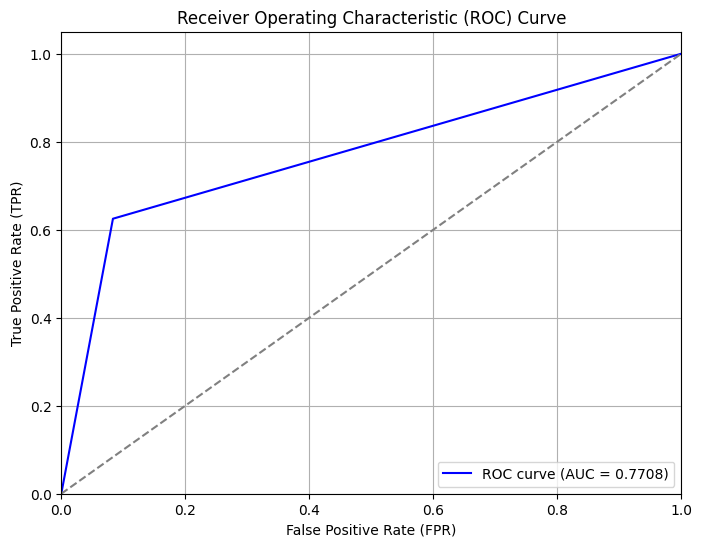

In [55]:
# Scikit-learn implementation.

# Compute AUC-ROC
auc_roc = roc_auc_score(y_true, y_pred)
print(f"AUC-ROC: {auc_roc:.4f}")

# Generate ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_roc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


The model performs reasonably well, but not perfectly. An AUC-ROC of 0.5 corresponds to a model that performs random classification, while an AUC-ROC of 1.0 would be a perfect model. A value of 0.77 shows that the model is able to distinguish between classes, but still makes some errors.


An AUC-ROC value of 0.7708 indicates that the model has a 77.08% chance of assigning a higher score to a patient with disease (positive class) than to one without disease (negative class).

## Precision- Recall Interpretation: ##

- Precision is high (83.33%), meaning that the model commits few false positives. Of all the times the model predicts that a patient has the disease, 83.33% of the times it is correct.
- However, recall is lower (62.5%), indicating that the model misses some positive cases. Of the patients who actually have the disease, only 62.5% are correctly detected.

This type of imbalance is common in many classification problems, and shows that, although the model is accurate in its positive predictions, it is not as sensitive in detecting all cases of the disease. This can be critical in medical problems, where detecting as many cases as possible (high recall) is often more important than minimizing false positives (high precision).

AUC-Precision-Recall: 0.8042


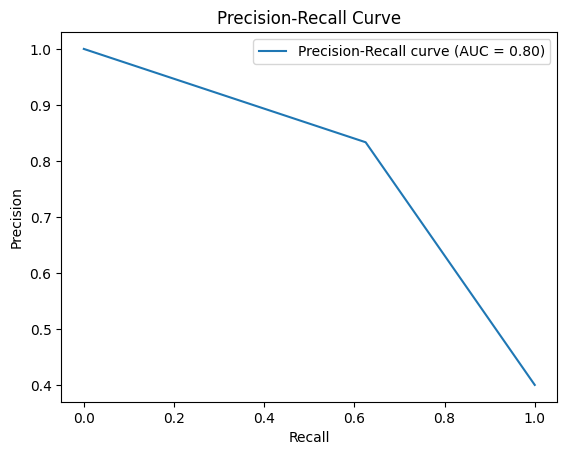

In [56]:
# Compute in different thresholds
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

# Compute Precision-Recall AUC 
auc_pr = sklearn_auc(recall, precision)

print(f"AUC-Precision-Recall: {auc_pr:.4f}")

plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.show()

## Final Interpretation ##

- **Accuracy:** = 80%
- **Precision:** = 83.33% 
- **Recall:** = 62.5%
- **F1-Score:** = 71.4%
- **Specificity:** = 91.6%
- **AUC-ROC:** = 77.08%
- **AUC-Precision-Recall:** = 80.04%
  
In summary, the model has high accuracy and specificity, indicating that when it predicts that a patient has the disease, it does so with confidence. However, its recall is lower, suggesting that the model is missing some true positive cases, which could be problematic in a clinical setting where detecting all cases of disease is crucial.

This type of analysis is vital in healthcare applications, where both proper disease detection and false positive reduction are important aspects. Adjustments to the model or decision thresholds can be considered to improve recall, ensuring that more positive cases are detected at the cost of a slight decrease in accuracy.